This is the machine learning, training model using Linear Regression

In [1]:
!pip install graphviz

The flow chart of training the ML 



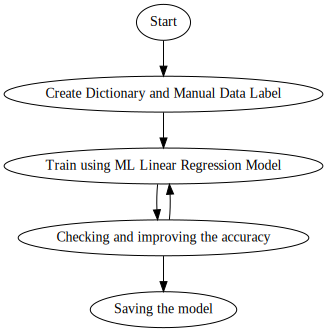

In [2]:
# Import the main tool from the library
from graphviz import Digraph

# 1. Create a new, empty flowchart object
dot = Digraph()

# 2. Add your "nodes" (the shapes with text)
dot.node('A', 'Start')
dot.node('B', 'Create Dictionary and Manual Data Label')
dot.node('C', 'Train using ML Linear Regression Model')
dot.node('D', 'Checking and improving the accuracy')
dot.node('E', 'Saving the model')

# 3. Add your "edges" (the arrows connecting the shapes)
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'D')
dot.edge('D', 'C')
dot.edge('D', 'E')

# 4. Display the flowchart
print("The flow chart of training the ML \n")
dot

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import os

Starting with creating a dictionary of labels for the categories of the cost. Since our dataset is small, we need quality dataset to achieve a better accuracy

In [4]:
# Data and Category dictionary
keyword_dictionary = {
    'Tiền nhân viên' : ['tiền lương', 'lương', 'trả lương', 'Trả tiền Khanh', 'trả tiền Nhi', 'Trả tiền Đạt', 'trả tiền Yến', 'tiền Thuý', 'Trả tiền Quỳnh', 'trả tiền Như Ý', 'trả tiền Phương',
                        'bảo vệ', 'trả tiền nhân viên', 'Tiền nhân viên', 'tiền nv', 'tiền NV', 'nhân viên', 'nv'],
    'Nguyên liệu & Thực phẩm' : ['mua hoa quả', 'tiền trái cây', 'hoa quả', 'trái cây', 'đào', 'dâu', 'xoài', 'chuối', 'dừa', 'cốt dừa', 'nước dừa', 'đậu đỏ',
                                 'cacao', 'bột cafe', 'bột trà sữa', 'bột', 'gạo rang', 'thạch nổ', 'thạch', 'kem tươi'
                                 'bánh tart', 'bánh', 'bánh kem', 'bánh ngọt', 'bánh trái cây', 'tiền đường', 'đường', 'đường phèn', 'syrup',
                                 'nguyên liệu', 'Nguyên liệu'],
    'Vật tư & Thiết bị' : ['vật liệu', 'ly nước', 'Ly', 'đá', 'Đá', 'bao ni lông', 'giấy',
                           'chai xịt', 'chai xịt phòng', 'chai xịt WC', 'tiền kệ bánh', 'kệ bánh', 'kệ',
                           'máy', 'máy lạnh', 'máy pha cà phê', 'máy đun nước', 'quạt', 'máy in ly nước', 'quầy bánh'],
    'Marketing & Trang trí': ['tiền hoa', 'tiền trang trí', 'trang trí', 'tiền marketing', 'marketing', 'thuê tiktoker', 'quảng cáo', 'tờ rơi', 'trang trí', 'in ấn', 'tiktok', 'instagram', 'mạng xã hội', 'facebook'],
    'Bảo trì & Vệ sinh' : ['Tiền thuê thợ sửa', 'tiền bảo trì', 'tiền sửa', 'bóng đèn', 'thạch cao', 'tiền sửa chữa', 'tiền thợ', 'tiền thuê dọn dẹp', 'sửa', 'chữa', 'bảo trì', 'thay', 'thay thế', 'sửa quầy bar', 'sửa bàn ghế', 'sửa bàn', 'sửa ghế', 'sửa chữa', 'sửa quầy bánh'],
    'Chi phí vận hành' : ['tiền điện thoại', 'tiền đt', 'đt', 'tiền xăng', 'tiền điện', 'tiền nước', 'tiền điện nước', 'tiền thuế', 'thuế', 'thuế VAT'],
    'Tiền khác' : ['tiền ăn nhân viên', 'tiền Như', 'tiền ăn của Như', 'tiền từ thiện', 'ủng hộ', 'tiền ăn của nhân viên', 'tiền ăn sáng', 'tiền ăn tối', 'tiền ăn trưa', 'tiền ăn', 'tiền ủng hộ', 'ăn']
}

Create a data frame using pandas library for the dictionary by iterating through each key-values and append each pair to the data frame

In [5]:
# Empty list for the dictionary description
dict_descriptions = []

# Empty list for the dictionary categories
dict_categories = []

# Adding each description and categories to the list
for category, descriptions in keyword_dictionary.items():
    for description in descriptions:
        dict_descriptions.append(description)
        dict_categories.append(category)

# Creating the data frame from the 2 list
dictionary_df = pd.DataFrame({
    'Description': dict_descriptions,
    'Category': dict_categories
    })

# Display the dataframe
dictionary_df

,Description,Category
0,tiền lương,Tiền nhân viên
1,lương,Tiền nhân viên
2,trả lương,Tiền nhân viên
3,Trả tiền Khanh,Tiền nhân viên
4,trả tiền Nhi,Tiền nhân viên
...,...,...
118,tiền ăn tối,Tiền khác
119,tiền ăn trưa,Tiền khác
120,tiền ăn,Tiền khác
121,tiền ủng hộ,Tiền khác


Next step is we need quality data input sentense that the manager would enter to the daily report spreadsheet. It needs to be a short sentence so that the data training model can draw a better vector

In [6]:
manual_labeled_data = {
    "Description" : [
        'tiền sửa chữa máy lạnh', 'tiền sửa thạch cao trong quán', 'tiền thợ điện', 'tiền thợ nước sửa ống nước trong quầy', 'tiền bảo trì hằng năm', 'tiền bình xịt phòng từ shipper', 'tiền sửa quầy bar hôm thứ 7 tuần trước',
        'tiền bảo trì máy cà phê', 'tiền bóng đèn thay trong WC',
        'mua 2kg dâu về làm nước', 'mua bột cacao làm nước', 'tiền trái cây nguyên liệu nước', 'tiền bánh tươi để bán', 'tiền nhập bánh tươi từ tiệm', 'mua chuối để làm matcha chuối', 'tiền syrup',
        'tiền ly giấy và nắp', 'tiền lồng kính cho quầy bánh', 'tiền mua máy cà phê', 'mua máy lạnh ở điện máy xanh',
        'tiền hoa trang trí quầy bánh',
        'tiền chạy quảng cáo trên facebook', 'tiền thuê tiktoker review quán', 'tiền thuê KOL để review quán', 'chạy quảng cáo trên instagram',
        'tiền từ thiện tháng này', 'tiền đóng góp cho đồng bào lũ lụt', 'tiền từ thiện cho trẻ em có hoàn cảnh khó khăn', 'tiền đổ xăng xe máy hôm nọ', 'tiền thay nhớt xe máy ở ngã ba',
        'tiền ăn của Như', 'tiền Như ăn sáng', 'ăn trưa của Như', 'Như ăn tối hết', 'trả tiền ăn của nhân viên', 'nhân viên ăn tiệc tuần trước',
        'tiền lương nhân viên A', 'lương bạn B tháng này', ' trả lương cho bác bảo vệ',
    ],
    "Category" : [
        'Bảo trì & Vệ sinh', 'Bảo trì & Vệ sinh', 'Bảo trì & Vệ sinh', 'Bảo trì & Vệ sinh', 'Bảo trì & Vệ sinh','Bảo trì & Vệ sinh','Bảo trì & Vệ sinh',
        'Bảo trì & Vệ sinh','Bảo trì & Vệ sinh',
        'Nguyên liệu & Thực phẩm','Nguyên liệu & Thực phẩm', 'Nguyên liệu & Thực phẩm', 'Nguyên liệu & Thực phẩm', 'Nguyên liệu & Thực phẩm', 'Nguyên liệu & Thực phẩm', 'Nguyên liệu & Thực phẩm',
        'Vật tư & Thiết bị', 'Vật tư & Thiết bị', 'Vật tư & Thiết bị', 'Vật tư & Thiết bị',
        'Marketing & Trang trí',
        'Marketing & Trang trí', 'Marketing & Trang trí', 'Marketing & Trang trí', 'Marketing & Trang trí',
        'Tiền khác', 'Tiền khác', 'Tiền khác', 'Tiền khác', 'Tiền khác', 'Tiền khác', 'Tiền khác',
        'Tiền khác', 'Tiền khác', 'Tiền khác', 'Tiền khác',
        'Tiền nhân viên', 'Tiền nhân viên', 'Tiền nhân viên',
    ]
}

In [7]:
# Creating a data frame
manual_df = pd.DataFrame(manual_labeled_data)

# Display the dataframe
manual_df

,Description,Category
0,tiền sửa chữa máy lạnh,Bảo trì & Vệ sinh
1,tiền sửa thạch cao trong quán,Bảo trì & Vệ sinh
2,tiền thợ điện,Bảo trì & Vệ sinh
3,tiền thợ nước sửa ống nước trong quầy,Bảo trì & Vệ sinh
4,tiền bảo trì hằng năm,Bảo trì & Vệ sinh
5,tiền bình xịt phòng từ shipper,Bảo trì & Vệ sinh
6,tiền sửa quầy bar hôm thứ 7 tuần trước,Bảo trì & Vệ sinh
7,tiền bảo trì máy cà phê,Bảo trì & Vệ sinh
8,tiền bóng đèn thay trong WC,Bảo trì & Vệ sinh
9,mua 2kg dâu về làm nước,Nguyên liệu & Thực phẩm


We need to combine these 2 dataset for training the model.

Note: we ignore the index when combining the 2 dataset so that all index has an unique data

In [8]:
# Combining dictionary and manual label
combined_train_df = pd.concat([dictionary_df, manual_df], ignore_index=True)

print(f"Created a combined training set with {len(combined_train_df)} examples.")

# Display the new Data Frame
combined_train_df

Created a combined training set with 162 examples.


,Description,Category
0,tiền lương,Tiền nhân viên
1,lương,Tiền nhân viên
2,trả lương,Tiền nhân viên
3,Trả tiền Khanh,Tiền nhân viên
4,trả tiền Nhi,Tiền nhân viên
...,...,...
157,trả tiền ăn của nhân viên,Tiền khác
158,nhân viên ăn tiệc tuần trước,Tiền khác
159,tiền lương nhân viên A,Tiền nhân viên
160,lương bạn B tháng này,Tiền nhân viên


Next, we will use the data frame to train the ML model, we will split the dataset to 80% for training and use the last 20% of the data to check if our model accuracy in predicting.

I choose Linear Regression model because our dataset is quite small and this model is really good with problems like sorting text to categories

In [9]:
# Train the Model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = combined_train_df['Description']
y = combined_train_df['Category']

# Split data and train on 80%, testing on 20%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)} examples")
print(f"Testing set size: {len(X_test)} examples")

# Convert each label into weighted numbers
vectorizer = TfidfVectorizer()

# Train the model on our training data

# Calculating the importance of each description
X_train_vectorized = vectorizer.fit_transform(X_train)

# Using the training data, creating vectors for the test data. The model does not learn from the test data
X_test_vectorized = vectorizer.transform(X_test)

# Learning from the training data
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

print("\n✅ Model trained successfully on the 80% training set.")

Training set size: 129 examples
Testing set size: 33 examples

✅ Model trained successfully on the 80% training set.


Then we use our trained model to make predictions on the testing data and see the accuracy of the predictions

In [10]:
# Predict the testing data
predictions = model.predict(X_test_vectorized)

# Calculate and print the accuracy and detailed report
accuracy = accuracy_score(y_test, predictions)
print(f"\nModel Accuracy on the Test Set: {accuracy * 100:.2f}%")

print("\nDetailed Classification Report:")
print(classification_report(y_test, predictions))


Model Accuracy on the Test Set: 87.88%

Detailed Classification Report:
                         precision    recall  f1-score   support

      Bảo trì & Vệ sinh       1.00      0.83      0.91         6
       Chi phí vận hành       1.00      0.50      0.67         2
  Marketing & Trang trí       0.75      0.75      0.75         4
Nguyên liệu & Thực phẩm       0.70      1.00      0.82         7
              Tiền khác       1.00      1.00      1.00         5
         Tiền nhân viên       1.00      1.00      1.00         4
      Vật tư & Thiết bị       1.00      0.80      0.89         5

               accuracy                           0.88        33
              macro avg       0.92      0.84      0.86        33
           weighted avg       0.91      0.88      0.88        33



Now we looking deeper into why we get that 87.88% accuracy by using the Confusion Matrix and see what Category that makes the model confused the most

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the probabilities
probabilities = model.predict_proba(X_test_vectorized)

# Create a boolean mask for where the predictions were wrong
error_mask = (y_test != predictions)

# Use the mask to filter all your data consistently
error_notes = X_test[error_mask]
actual_error_categories = y_test[error_mask]
predicted_error_categories = predictions[error_mask] # Use the mask directly
error_probabilities = probabilities[error_mask]

# Create a DataFrame to analyze errors
error_analysis_df = pd.DataFrame({
    'Note': error_notes,
    'Actual Category': actual_error_categories,
    'Predicted Category': predicted_error_categories,
    'Confidence': error_probabilities.max(axis=1) # Confidence of the wrong prediction
})

print("--- DETAILED ERROR ANALYSIS ---")
if error_analysis_df.empty:
    print("The model has guessed correctly everything")
else:
    print(error_analysis_df)

--- DETAILED ERROR ANALYSIS ---
                  Note        Actual Category       Predicted Category  \
48            vật liệu      Vật tư & Thiết bị  Nguyên liệu & Thực phẩm   
89   tiền thuê dọn dẹp      Bảo trì & Vệ sinh    Marketing & Trang trí   
109               thuế       Chi phí vận hành  Nguyên liệu & Thực phẩm   
79           instagram  Marketing & Trang trí  Nguyên liệu & Thực phẩm   

     Confidence  
48     0.485703  
89     0.282543  
109    0.216422  
79     0.255104  


From this error analysis, we can see that the model is confused about the single word "liệu" in "vật liệu" (Category: Vật tư & Thiết bị) and "nguyên liệu" (Category: Nguyên liệu & Thực phẩm)

When we do single gram for giving weighted number for a single word, this happens a lot:

For example, "bánh" in "mua bánh"(Category: Nguyên liệu & Thực phẩm) and "sửa quầy bánh" (Category: Bảo trì & Vệ sinh)

The word "thuê" (rent) in "tiền thuê dọn dẹp" (Renting cleaning service) (Category: Bảo trì & Vệ sinh) and "thuê KOL" (renting famous people to review) (Category: Marketing & Trang trí)


We will plot the Confusion Matrix to have a deeper analysis

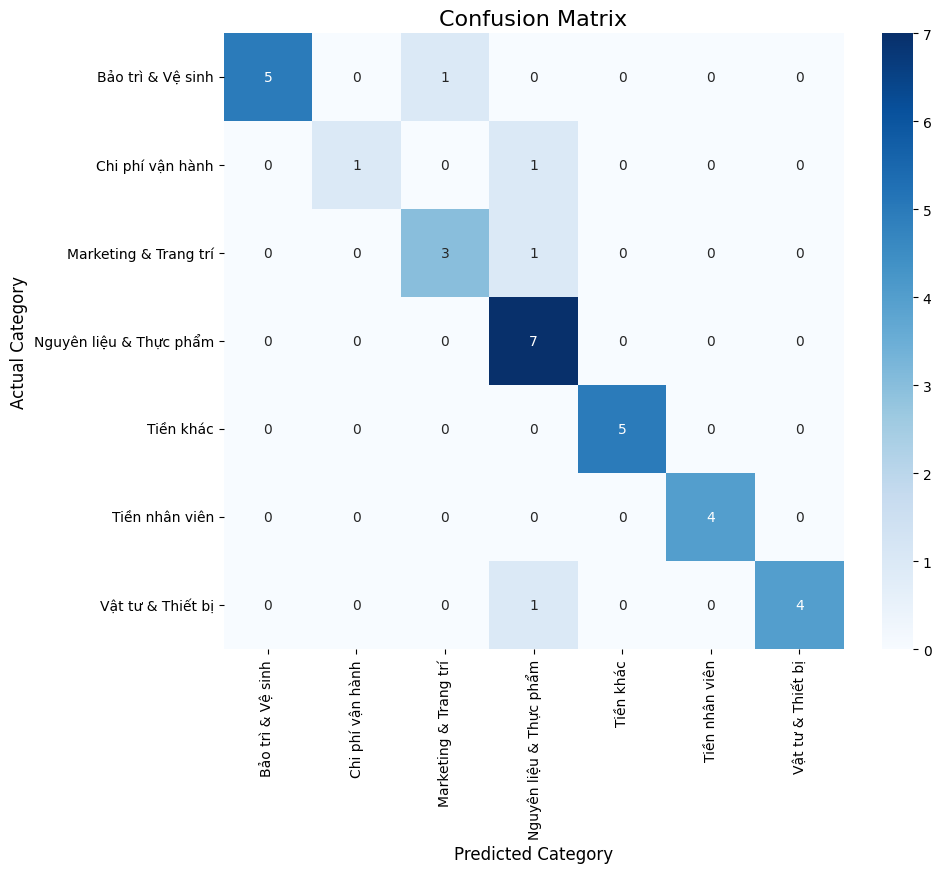

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Get category names for labeling the chart
class_names = model.classes_

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Category', fontsize=12)
plt.xlabel('Predicted Category', fontsize=12)
plt.show()

From the Confusion Matrix, we can see "Nguyên liệu & Thực phẩm" overlap with  "Marketing & Trang trí", "Vật tư & Thiết bị" and "Chi phí vận hành".

While "Marketing & Trang Trí" overlap with "Bảo trì & Vệ sinh" from the word "thuê" we suspect above.

We can try to train the data on splitting the label into 2 words each instead
For example, "mua vật liệu" and "mua nguyên liệu" will be split into "mua vật" "vật liệu" and "mua nguyên" "nguyên liệu". Which this method might eliminate this problem. But we will sacrifice the accuracy of a single word for this trade off.

In [13]:
print("--- Training Bigram Model ---")

# Vectorize using single words AND two-word phrases
vectorizer_bi = TfidfVectorizer(ngram_range=(1, 2))
X_train_bi = vectorizer_bi.fit_transform(X_train)
X_test_bi = vectorizer_bi.transform(X_test)

# Train the model
model_bi = LogisticRegression()
model_bi.fit(X_train_bi, y_train)

# Evaluate the model
predictions_bi = model_bi.predict(X_test_bi)
accuracy_bi = accuracy_score(y_test, predictions_bi)
report_bi = classification_report(y_test, predictions_bi, zero_division=0)

print(f"\nBigram Model Accuracy: {accuracy_bi * 100:.2f}%")
print("\nClassification Report (Bigram):")
print(report_bi)

--- Training Bigram Model ---

Bigram Model Accuracy: 84.85%

Classification Report (Bigram):
                         precision    recall  f1-score   support

      Bảo trì & Vệ sinh       1.00      0.83      0.91         6
       Chi phí vận hành       1.00      0.50      0.67         2
  Marketing & Trang trí       0.67      0.50      0.57         4
Nguyên liệu & Thực phẩm       0.64      1.00      0.78         7
              Tiền khác       1.00      1.00      1.00         5
         Tiền nhân viên       1.00      1.00      1.00         4
      Vật tư & Thiết bị       1.00      0.80      0.89         5

               accuracy                           0.85        33
              macro avg       0.90      0.80      0.83        33
           weighted avg       0.88      0.85      0.85        33



Our accuracy score decreases from 87.88% to 84.85%, from the report we see that the model only have 67% accuracy on "Marketing & Trang trí", with the confident level of 57%.

And for "Nguyên liệu & Thực phẩm" the accuracy score is 64% with the confident level of 78%. When comparing from the previous training model, we did worse here.

Lets get the error report to see what happened

In [14]:
# Get the probabilities
probabilities = model_bi.predict_proba(X_test_bi)
# Create a boolean mask for where the predictions were wrong
error_mask_bi = (y_test != predictions)

# Use the mask to filter all your data consistently
error_notes_bi = X_test[error_mask_bi]
actual_error_categories_bi = y_test[error_mask_bi]
predicted_error_categories_bi = predictions_bi[error_mask_bi] # Use the mask directly
error_probabilities_bi = probabilities[error_mask_bi]

# Create a DataFrame to analyze errors
error_analysis_df = pd.DataFrame({
    'Note': error_notes_bi,
    'Actual Category': actual_error_categories_bi,
    'Predicted Category': predicted_error_categories_bi,
    'Confidence': error_probabilities_bi.max(axis=1) # Confidence of the wrong prediction
})

print("--- DETAILED ERROR ANALYSIS ---")
if error_analysis_df.empty:
    print("Tuyệt vời! Mô hình đã dự đoán đúng tất cả các mẫu thử nghiệm.")
else:
    print(error_analysis_df)

--- DETAILED ERROR ANALYSIS ---
                  Note        Actual Category       Predicted Category  \
48            vật liệu      Vật tư & Thiết bị  Nguyên liệu & Thực phẩm   
89   tiền thuê dọn dẹp      Bảo trì & Vệ sinh    Marketing & Trang trí   
109               thuế       Chi phí vận hành  Nguyên liệu & Thực phẩm   
79           instagram  Marketing & Trang trí  Nguyên liệu & Thực phẩm   

     Confidence  
48     0.428148  
89     0.249274  
109    0.218800  
79     0.249184  


Turns out we did not improve training the data on both single word and 2 words. The model is still confuse on the same problem. We will plot the Confusion Matrix to double check

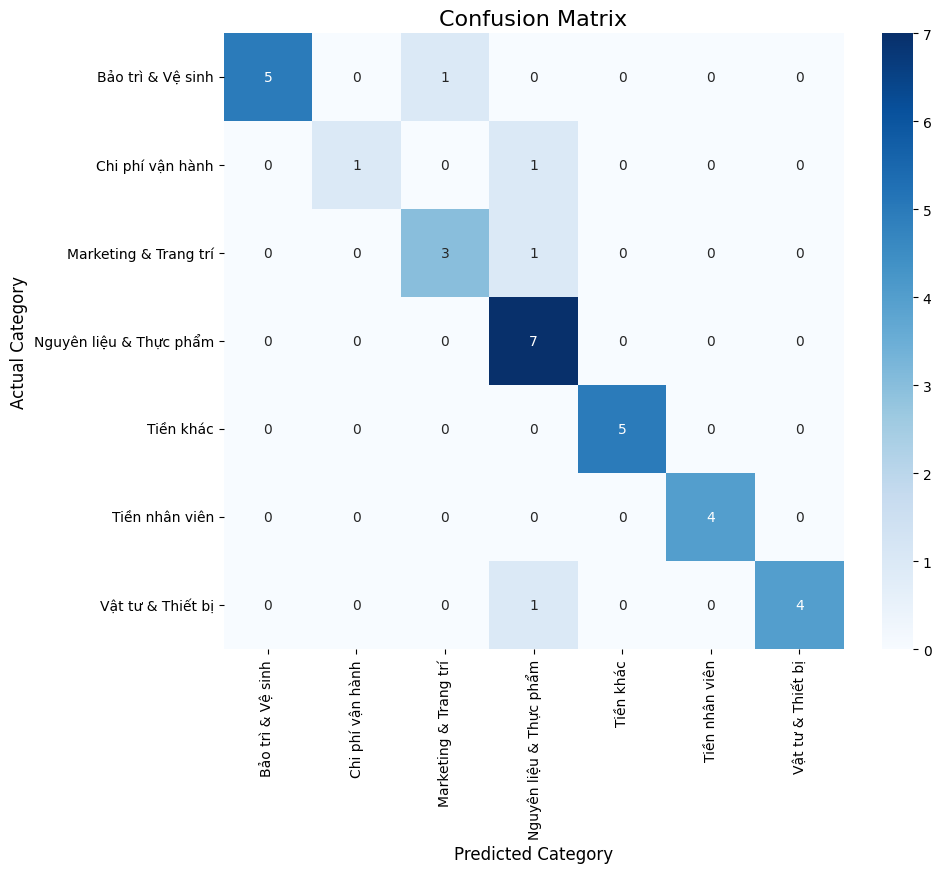

In [15]:
# Get the confusion matrix
cm2 = confusion_matrix(y_test, predictions)

# Get category names for labeling the chart
class_names = model.classes_

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Category', fontsize=12)
plt.xlabel('Predicted Category', fontsize=12)
plt.show()

The exact same problem still exist but the model accuracy decreases. Since we don't have a huge dataset to train on, this is the limitation of our models.

 We can try with the tri-model to confirm. Although my suspicion is the accuracy will decrease.

In [16]:
print("--- Training Trigram Model ---")

# Vectorize using single words AND two-word phrases AND three-word phrases
vectorizer_tri = TfidfVectorizer(ngram_range=(1, 3))
X_train_tri = vectorizer_tri.fit_transform(X_train)
X_test_tri = vectorizer_tri.transform(X_test)

# Train the model
model_tri = LogisticRegression()
model_tri.fit(X_train_tri, y_train)

# Evaluate the model
predictions_tri = model_tri.predict(X_test_tri)
accuracy_tri = accuracy_score(y_test, predictions_tri)
report_tri = classification_report(y_test, predictions_tri, zero_division=0)

print(f"\nBigram Model Accuracy: {accuracy_tri * 100:.2f}%")
print("\nClassification Report (Trigram):")
print(report_tri)

--- Training Trigram Model ---

Bigram Model Accuracy: 81.82%

Classification Report (Trigram):
                         precision    recall  f1-score   support

      Bảo trì & Vệ sinh       1.00      0.83      0.91         6
       Chi phí vận hành       1.00      0.50      0.67         2
  Marketing & Trang trí       0.67      0.50      0.57         4
Nguyên liệu & Thực phẩm       0.64      1.00      0.78         7
              Tiền khác       1.00      0.80      0.89         5
         Tiền nhân viên       0.80      1.00      0.89         4
      Vật tư & Thiết bị       1.00      0.80      0.89         5

               accuracy                           0.82        33
              macro avg       0.87      0.78      0.80        33
           weighted avg       0.86      0.82      0.82        33



Our suspicion is correct. We will keep the single word model and save it to do analysis later on

In [18]:
from google.colab import drive
import joblib
import os

# 1. Mount your Google Drive
# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

# 2. Define a path to save your model files
# A good practice is to create a dedicated folder.
model_folder_path = '/content/drive/My Drive/Monatea_Cafe/'
os.makedirs(model_folder_path, exist_ok=True) # This creates the folder if it doesn't exist

# 3. Save the model and the vectorizer to the defined path
joblib.dump(model, f"{model_folder_path}expense_model.joblib")
joblib.dump(vectorizer, f"{model_folder_path}tfidf_vectorizer.joblib")

print(f"✅ Model and vectorizer saved successfully to your Google Drive in the '{model_folder_path}' folder.")

Mounted at /content/drive
✅ Model and vectorizer saved successfully to your Google Drive in the '/content/drive/My Drive/Monatea_Cafe/' folder.
